
# Project: Investigate a Dataset (TMDb movie data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The author always had a big interest in watching movies. As most people did, the author also experienced good and bad movies. But what determines if a movie is considered as good or bad? There could be several factors influencig the quality of a movie, as for example the budget, genre, etc. This little project should help the author to improve his data analytics skills and explore some of the success criteria for movies.

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv

--2021-05-20 00:00:16--  https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.249.90.229, 13.249.90.192, 13.249.90.78, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.249.90.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6883750 (6.6M) [text/csv]
Saving to: ‘tmdb-movies.csv.8’

tmdb-movies.csv.8   100%[===================>]   6.56M  28.2MB/s    in 0.2s    

2021-05-20 00:00:16 (28.2 MB/s) - ‘tmdb-movies.csv.8’ saved [6883750/6883750]



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
#load data and show data's first entries
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
#know the shape of data "number of rows and coloumns"
df.shape

(10866, 21)

In [7]:
# know info about data like coloumns names , datatypes and number of non-null values in each coloumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
#statistical summary of data variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#know number of duplicated rows 
df.duplicated().sum()

1

In [10]:
#know number of null values in each coloumn  
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 
1- many rows (cast - director - keywords - genres - production_companies) have multiple values seperated by | 
2- There are coloumns which will not be used in the analysis (imdb_id - homepage - overview - release_data - tageline,budget,revenue)
3- many movies has 0 values in runtime, budget_adj, revenue_adj , so replacing these values with nan values and remove them

In [11]:
#drop unneeded coloumns
df = df.drop(['id','imdb_id', 'homepage', 'overview', 'tagline','budget','revenue'], axis=1)

In [12]:
# replacing 0 with nan values and removing them
cols = ['runtime','budget_adj','revenue_adj']
for c in cols:
    df[c].replace(0, np.NAN, inplace=True)

#drop duplicates
df.drop_duplicates(inplace = True)

#drop NAn values 
df.dropna(axis=0, inplace=True)

df.shape

(3677, 14)

In [13]:
#seperating values with several values 
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))


In [14]:
#drop coloumns before seperation and join dataframes
df = df.drop(['cast', 'director','keywords', 'genres', 'production_companies'], axis=1)
df = df.join([df_c, df_d, df_k, df_g, df_p])
df.head(2)

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,...,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,32.985763,Jurassic World,124.0,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.419936,Mad Max: Fury Road,120.0,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


<a id='eda'></a>
## Exploratory Data Analysis

###  single-variable (1d) explorations

In [2]:
def plott(t,x,y,typ,inp):
    '''
    function to plot histograms and boxplots
    inputs: t --> tittle
            x --> x_label
            y --> y_label
            typ --> 1 for histogram , 0 for boxplot
            inp --> input to be plotted
    '''
    if typ == 1:
        df[inp].hist();
    else:
        df[inp].plot(kind='box');
        
    plt.title(t.title(),fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(x.title(),fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel(y.title(),fontsize = 10, weight = "bold")
    # (If there is a legend, you can use this) Change legend title and format it, move legend
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Legend_Title", title_fontsize = 12);

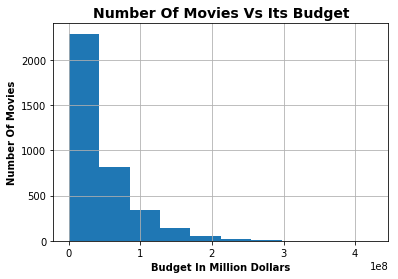

In [20]:
#plot budget histogram
plott('number of movies vs its budget','budget in million dollars','number of movies',1,'budget_adj')

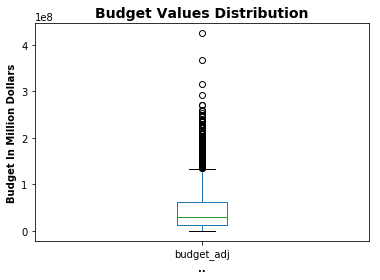

In [21]:
#plot budget boxplot
plott('budget values distribution','..','budget in million dollars',0,'budget_adj')

## as seen from budget Histogram and boxplot, mean is around 1.5 million and most movies budget are under 1 million , there are some extreme values around 4 million

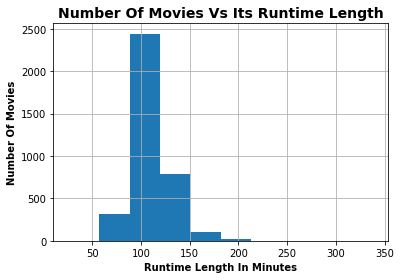

In [22]:
#plot runtime histogram
plott('number of movies vs its runtime length','runtime length in minutes','number of movies',1,'runtime')

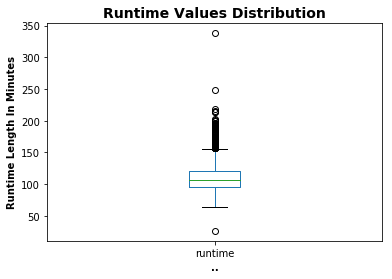

In [24]:
#runtime boxplot
plott('runtime values distribution','..','runtime length in minutes',0,'runtime')

## as seen from runtime Histogram and boxplot, mean is around 100 minutes and most movies runtime are in the range between 90 and 120 minutes , there are also some extreme values around 350 minutes 

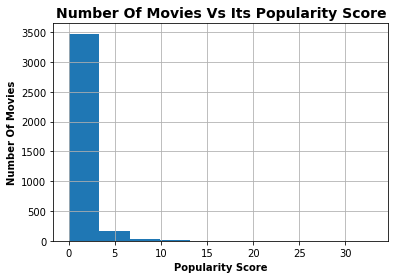

In [27]:
#plot popularity histogram
plott('number of movies vs its popularity score','popularity score','number of movies',1,'popularity')

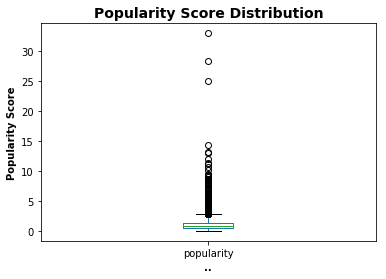

In [28]:
#popularity boxplot
plott('popularity score Distribution','..','popularity score',0,'popularity')

## as seen from popularity Histogram and boxplot, mean is around 5 and most movies scores are in the range between 0 and 5 , there are also some extreme values above 30

### Research Question 1 (how is the movie industry changing over Time regarding buget, Rate and popularity?) 

In [38]:
import seaborn as sns

def myTimePlot(df,xVar,x,y,t):
    '''
    function to plot xVar along with years 
    inputs: 
        df --> DataFrame
        xVar --> coloumn to be plotted
        x --> xLabel
        y --> ylabel
        t --> tittle of figure
        
    outputs: Timeseries plot
    '''
    #plotting figure
    sns.set(rc={'figure.figsize':(14,8)})
    #group data of each year and taking its mean
    df.groupby('release_year')[xVar].mean().plot()
    #labels
    plt.ylabel(y);
    plt.xlabel(x)
    plt.title(t);

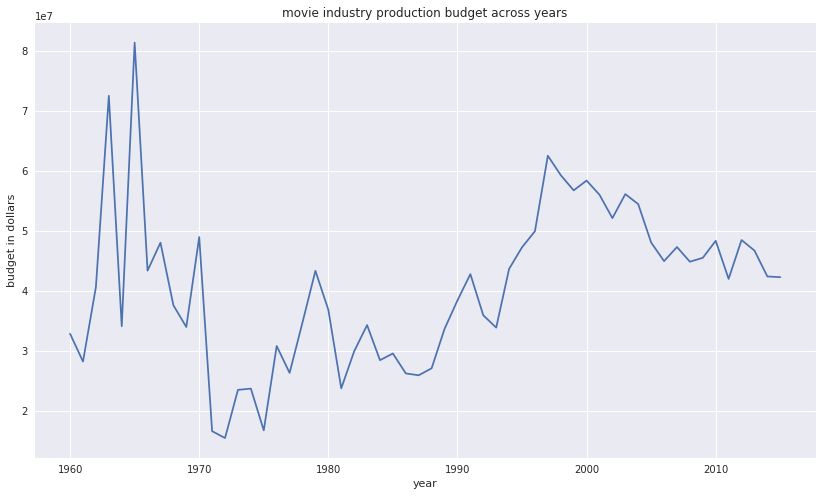

In [39]:
#plotting budget of movies over the years 
myTimePlot(df,'budget_adj','year','budget in dollars','movie industry production budget across years')

## movies budget was as its peak around year 1965, almost decreases since then until 1990, and started to rise up again

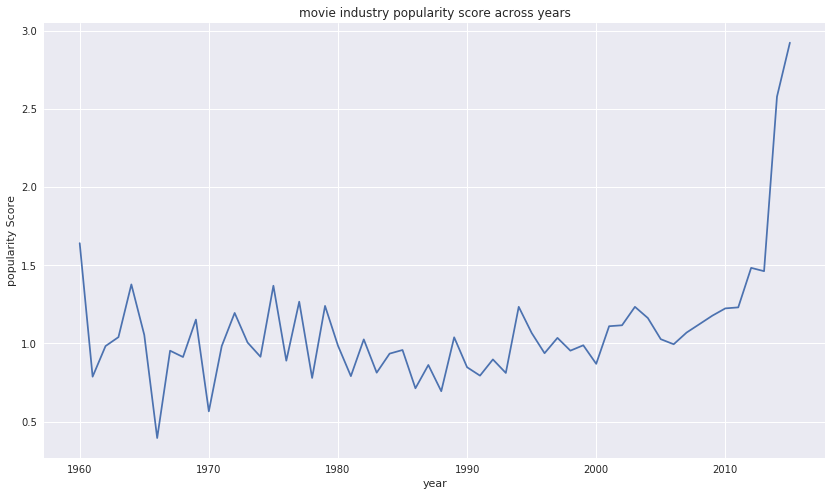

In [40]:
#plotting popularity of movies over the years 
myTimePlot(df,'popularity','year','popularity Score','movie industry popularity score across years')

## popularity scores was in range 0.5 to 1.5 until 2010 when it started to rise up daramatically

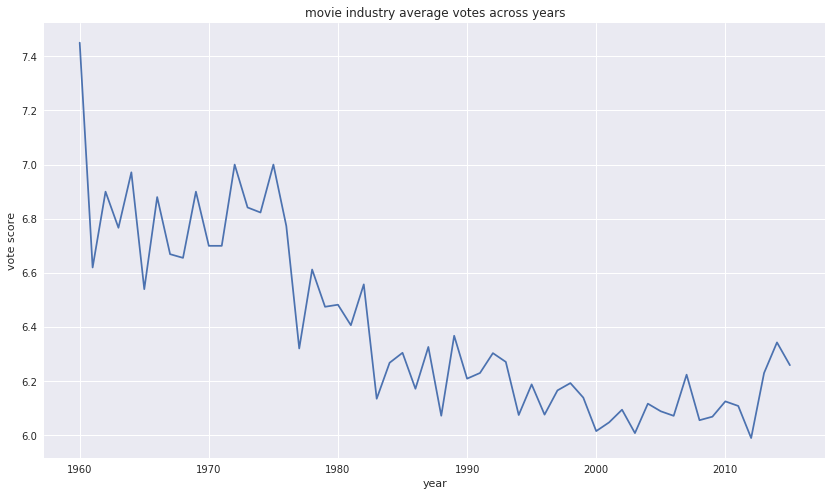

In [41]:
#plotting vote averages of movies over the years 
myTimePlot(df,'vote_average','year','vote score','movie industry average votes across years')

## vote averages score was almost high (around 6.8), and decreases since 1975 until end (around 6.2)

### Research Question 2  ( what are the most popular genres ? )

In [54]:
def mypiePlot(df,xVar,yVar,t):
    '''
    function to plot pie charts 
    inputs: 
        df --> DataFrame
        xVar --> coloumn to be plotted
        yVar --> plotting values according to this value

        t --> tittle of figure
        
    outputs: pie chart plot
    '''
    #group by coloumn, and then select top 10 values to show
    if yVar == 'Count':
        df.groupby([xVar]).size().sort_values(ascending=False)[:10].plot.pie(figsize=(10,10),autopct="%.2f")
    elif yVar == 'Revenue':
        df.groupby([xVar]).revenue_adj.sum().sort_values(ascending=False)[:10].plot.pie(figsize=(10,10),autopct="%.2f")
    
    #tittle for the chart
    plt.title(t.title(),fontsize=10,weight='bold')

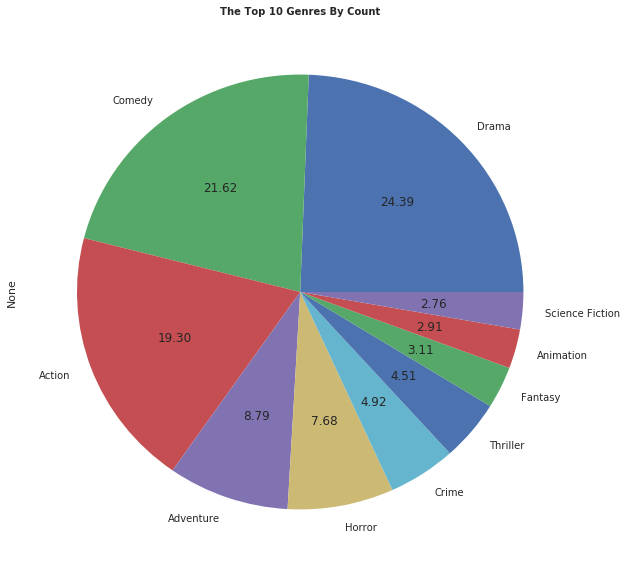

In [56]:
# I took first genre of every movie as the main genre, and plot pieplot in respect to genre count
mypiePlot(df,'genres_1','Count','The top 10 Genres By Count')

## Drama is the most famous genre by number of movies, following by Comedy and Action

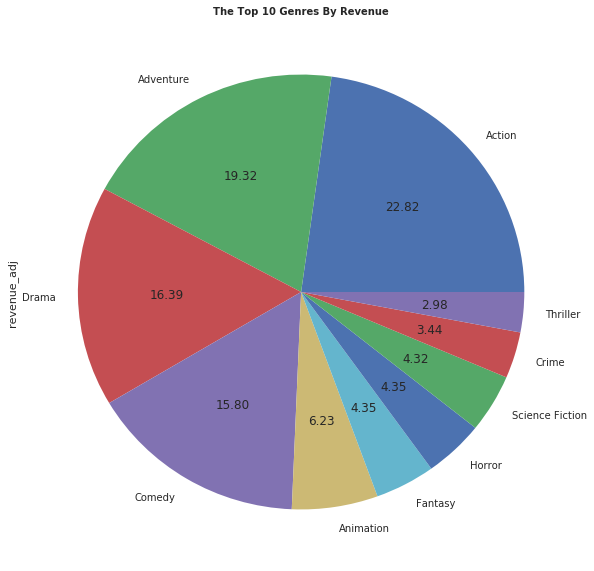

In [57]:
# I took first genre of every movie as the main genre, and plot pieplot in respect to Revnue
mypiePlot(df,'genres_1','Revenue','The top 10 Genres By Revenue')

## Action is the most Revenued genre, following by Adventure, Drama and Comedy

### Research Question 3  ( what are the most popular production Companies ? )

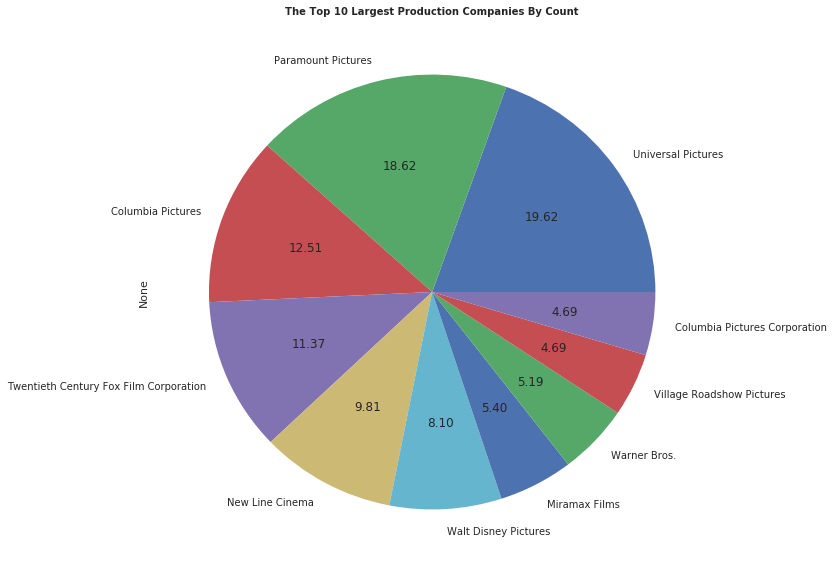

In [58]:
# I took first production company of every movie as the main company, and plot pieplot in respect to genre count
mypiePlot(df,'production_companies_1','Count','the top 10 largest production companies by Count')

## Universal Pictures is the largest production company by number of movies, following by Paramount Pictures and Coloumbia Pictures

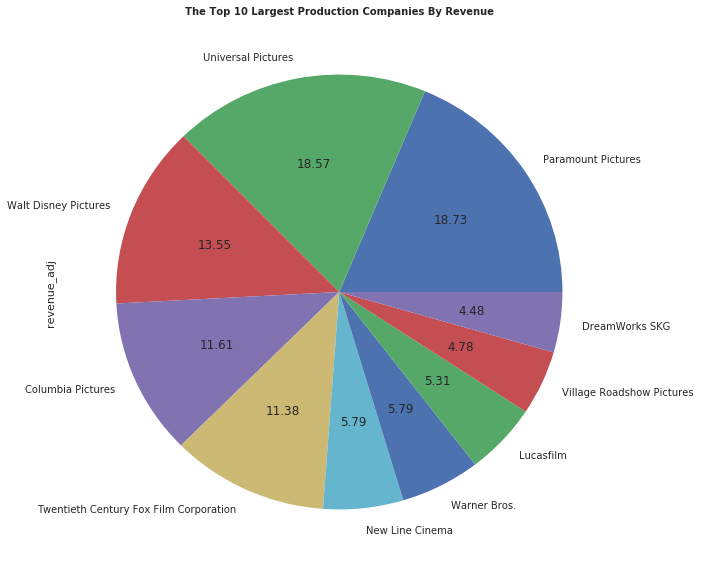

In [59]:
# I took first production company of every movie as the main company, and plot pieplot in respect to Revenue
mypiePlot(df,'production_companies_1','Revenue','the top 10 largest production companies by Revenue')

## Paramount Pictures is the most revenued production company, following by Universal Pictures and Walt Disney Pictures

<a id='conclusions'></a>
## Conclusions

- **Budget Graph is aganist my expectations, as I expected the peak of industry budget to be in the recent years, not in 60's.**
- **Popularity Scores tends to increase in recent years, due to awarness of people and interaction with different social platforms.** 
- **people tends to be more critique, as vote average score tends to decrease across years.**
- **most famous genre isn't necesseraly the most revenued one, as the most famous genre is Drama, but the most Revenued one is Action.**
- **Walt Disney is not in top 4 production companies who produces almost half of the movies industry, but it is amoung top 3 revenued companies.** 
- **Universal Pictures is the top producing company and second on revenue, while paramount pictures is second biggest producing company and first on revenue.**

### Limitations 
**results are taken from dataset after clearning and optimizing, results can be indicators and cannot be generalized as there were many removed entries from dataset due to missing data.**

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0